# KAGGLE-LIKE CHALLENGE
On vous propose ici de tester tout ce que vous avez appris sur le machine learning supervisé, dans le but de faire un modèle de prédiction sur des données fournies, à la manière des compétitions Kaggle.

**Déroulement d'un challenge Kaggle**
- Kaggle vous envoie toujours deux datasets :
  - un fichier data_train.csv qui contient des données correspondant aux variables X, et au label Y à prédire. Utilisez ce fichier pour entraîner vos modèles comme d'habitude.
  - un fichier data_test.csv, qui contient les données X au même format que dans data_train.csv, mais cette fois les labels sont cachés. Votre but est de faire des prédictions sur ces données et de renvoyer ces prédictions à Kaggle, pour qu'ils évaluent votre modèle de manière indépendante
- Kaggle compare vos prédictions aux vrais labels et propose un leaderboard (équipes classées en fonction de leur score)
- Kaggle vous annonce à l'avance quelle métrique va être utilisée pour évaluer les modèles : veillez à utiliser la même métrique pour évaluer les performances de vos modèles

**Prédiction de conversion**

Ici, on vous propose d'essayer de créer le meilleur modèle pour prédire des conversions en fonction de différentes variables explicatives. Vos modèles seront évalués à l'aide du f1-score.

*Inspirez-vous du template ci-dessous pour la lecture des fichiers, la structure à suivre, et l'écriture des prédictions finales.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Import dataset
print("Loading dataset...")
data = pd.read_csv("C:\\Users\\Youssouf\\Desktop\\Fullstack\\FULL_STACK_12_WEEK_PROGRAM-master\\Git_Github\\Jedhabootcamp_Projects\\CONVERSION RATE\\conversion_data_train.csv")
print("...Done.")
print()

Loading dataset...
...Done.



# Basic stats

In [106]:
desc = data.describe(include='all')
display(desc)
print(data.shape)

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


(284580, 6)


In [9]:
data.country.value_counts(normalize=True)

US         0.563226
China      0.242258
UK         0.153226
Germany    0.041290
Name: country, dtype: float64

In [12]:
data.age.value_counts(ascending=True).head(10)

123    1
72     1
73     1
111    1
79     1
77     1
70     2
69     3
68     5
67     5
Name: age, dtype: int64

In [8]:
data.new_user.value_counts(normalize=False)

1    216744
0     99456
Name: new_user, dtype: int64


In [8]:
data.source.value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [16]:
data.total_pages_visited.value_counts(ascending=True).head(10)

28      1
29      2
27      7
26     17
25     39
24     46
23    113
22    180
21    296
20    405
Name: total_pages_visited, dtype: int64

In [4]:
data.converted.value_counts(normalize=True)

0    0.967742
1    0.032258
Name: converted, dtype: float64

---

# Visualisation exploratoire des variables 

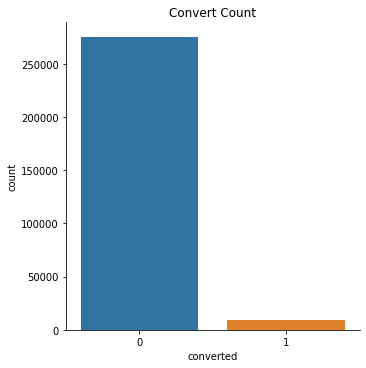

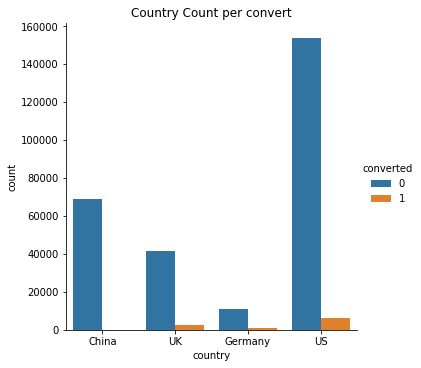

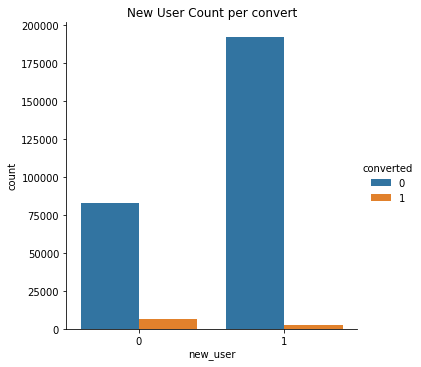

In [107]:
sns.catplot(data =data, x ="converted", kind='count')
plt.title("Convert Count")
sns.catplot(data =data, x ="country", kind='count', hue="converted")
plt.title("Country Count per convert")
sns.catplot(data =data, x ="new_user", kind='count', hue="converted")
plt.title("New User Count per convert")
plt.show()

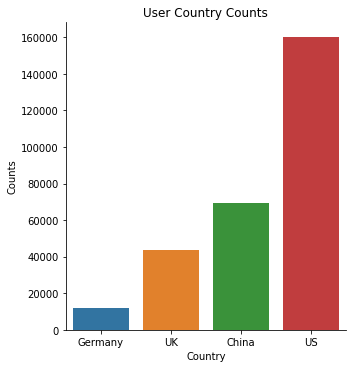

In [108]:
# Visualisation de country
country = data.country.value_counts()
df_country = pd.DataFrame({"Country": country.index, "Counts":country.values}).sort_values(by ="Counts", ascending=True)
sns.catplot(data = df_country, x = "Country", y = "Counts", kind ="bar")
plt.title("User Country Counts")
plt.show()

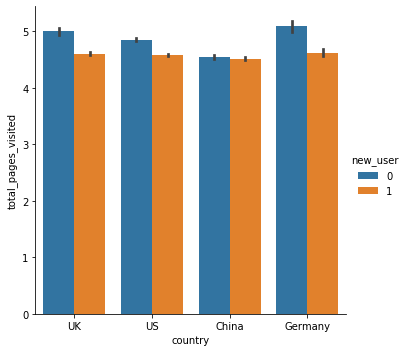

In [16]:
sns.catplot(data = data, x = "country", y = "total_pages_visited", kind ="bar", hue = "new_user")
plt.show()

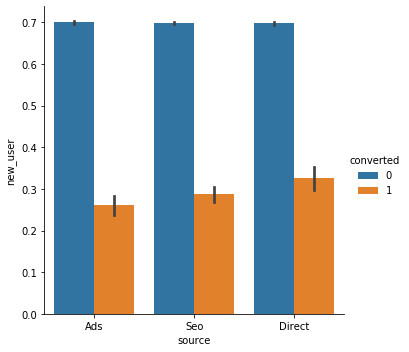

In [17]:
sns.catplot(data = data, x = "source", y = "new_user", kind ="bar", hue = "converted")

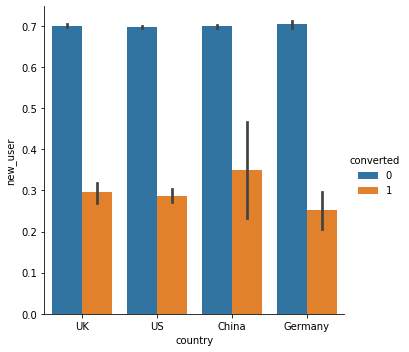

In [18]:
sns.catplot(data = data, x = "country", y = "new_user", kind ="bar", hue = "converted")

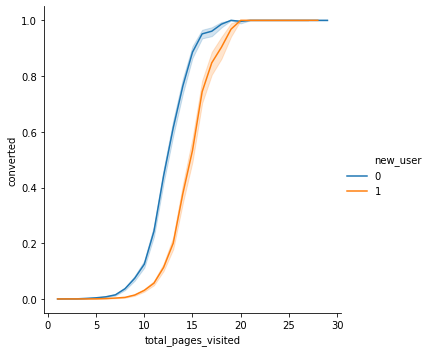

In [108]:
sns.relplot(data = data, y ="converted", x = "total_pages_visited", kind = 'line', hue = "new_user" )
plt.show()

In [73]:
#sns.lmplot(data = data, y ="converted", x = "total_pages_visited", logistic = True )
#sns.lmplot(data = data, y ="converted", x = "age", logistic = True)

## Visualisation des variables  avec matplotlib

In [27]:
converted_count = pd.DataFrame(data.converted.value_counts(), index = data.converted.unique())
converted_count.index = ["No","Yes"]
converted_count

,converted
No,306000
Yes,10200


In [28]:
country_count = pd.DataFrame({"Country":data.country.value_counts().values}, index =[i for i in data.country.value_counts().index])
country_count

,Country
US,178092
China,76602
UK,48450
Germany,13056


In [53]:
converted_yes_count = data[data["converted"]==1]
print("Counts of customers converted : ",data.converted.value_counts().values[1])
print(converted_yes_count.shape)

Counts of customers converted :  10200
(10200, 6)


In [55]:
converted_yes_country_count = pd.DataFrame({"Country":converted_yes_count.country.value_counts().values}, index =[i for i in converted_yes_count.country.value_counts().index])
converted_yes_country_count

,Country
US,6732
UK,2550
Germany,816
China,102


C:\Users\Youssouf\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
C:\Users\Youssouf\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':
C:\Users\Youssouf\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


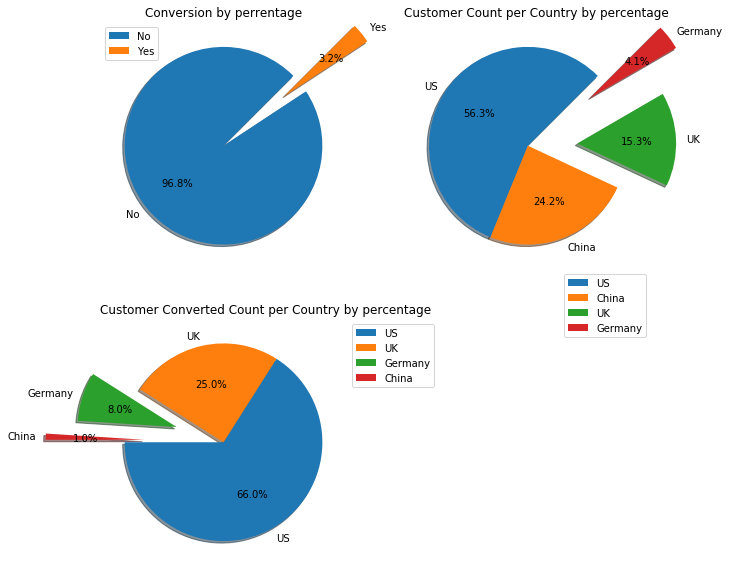

In [59]:
# Visualisation de la variable cible
plt.figure(figsize=(10,10))
explode1 = [0, 0.8]
explode2 = [0, 0, 0.5, 0.8]

plt.subplot(221)
plt.pie(converted_count, explode1, autopct='%1.1f%%',shadow=True, startangle=45, labels = converted_count.index) 
plt.legend(converted_count.index,loc='upper left', bbox_to_anchor=(0,1))
plt.title("Conversion by perrentage")


plt.subplot(222)
plt.pie(country_count, explode2, autopct='%1.1f%%',shadow=True, startangle=45, labels = country_count.index) 
plt.legend(country_count.index, loc='upper right', bbox_to_anchor=(1,0))
plt.title("Customer Count per Country by percentage", loc = "left")


plt.subplot(223)
plt.pie(converted_yes_country_count, explode2, autopct='%1.1f%%',shadow=True, startangle=180, labels = converted_yes_country_count.index) 
plt.legend(converted_yes_country_count.index, loc='upper left', bbox_to_anchor=(1,1))
plt.title("Customer Converted Count per Country by percentage", loc = "left")

plt.show()

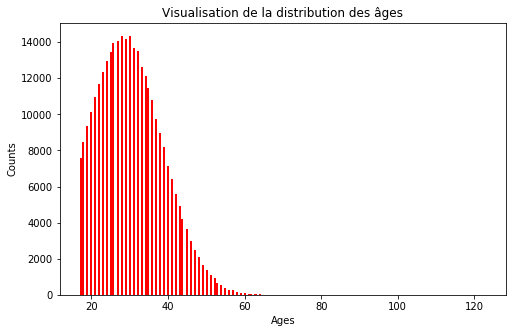

In [71]:
# Visualisation de la distribution des âges
plt.rcParams['figure.figsize']=8,5   
plt.hist(data.age, 200, facecolor='r', density=False )
plt.title("Visualisation de la distribution des âges")
plt.xlabel("Ages")
plt.ylabel("Counts")
plt.show()

# Check correlations

In [109]:
corr = data.corr()
#corr = corr.converted.sort_values(ascending = False)
#corr = abs(corr.converted.sort_values(ascending = False))
corr

,age,new_user,total_pages_visited,converted
age,1.000000,0.011676,-0.045365,-0.088265
new_user,0.011676,1.000000,-0.082986,-0.152115
total_pages_visited,-0.045365,-0.082986,1.000000,0.529192
converted,-0.088265,-0.152115,0.529192,1.000000


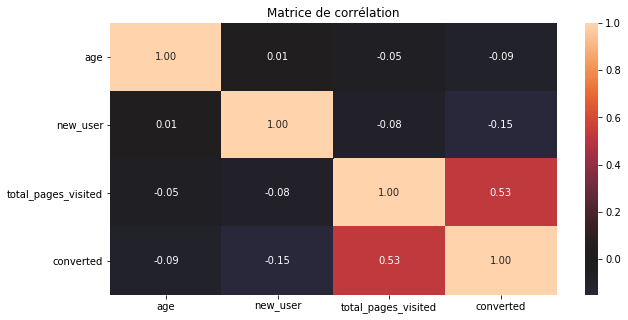

In [75]:
# Set up the matplotlib figure & Compute the correlation matrix
f, ax = plt.subplots(figsize=(10, 5))
# Draw the heatmap
ax = sns.heatmap(corr,  center=0, annot = True,fmt='.2f')
botom, top = ax.get_ylim()
ax.set_ylim(botom +0.5, top -0.5)
plt.title("Matrice de corrélation")
plt.show()

---

## Choose variables to use in the model, and create train and test sets

- Variables-cible : Y = 'converted'
- Variables explicatives : 'country', 'age', 'new_user', 'source', 'total_pages_visited', 
- Nombre d'exemples : 316200
- Imputation de valeurs manquantes : None
- Normalisation des variables quantitatives: 'age', 'new_user', 'total_pages_visited'
- Encodage des variables catégorielles : 'country', 'source'
- Encodage des labels : None

In [110]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target_variable = "converted"
categorical_indices = [0,3]
numeric_indices = [1,2,4]


X = data.loc[:,features_list]
y = data.loc[:,target_variable]

print("...Done.")
print()

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


In [111]:
# Divide dataset Train set & Test set 
from sklearn.model_selection import train_test_split
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42, stratify = y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [112]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 21 1 'Seo' 6]
 ['US' 35 1 'Seo' 4]
 ['US' 39 1 'Ads' 4]
 ['US' 43 1 'Seo' 4]
 ['China' 30 1 'Ads' 1]]
[['US' 31 1 'Ads' 2]
 ['US' 18 1 'Seo' 2]]

[0, 0, 0, 0, 0]
[0, 0]


## Training pipeline

In [113]:
# Encoding categorical features and standardizing numerical features
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[['US' 21 1 'Seo' 6]
 ['US' 35 1 'Seo' 4]
 ['US' 39 1 'Ads' 4]
 ['US' 43 1 'Seo' 4]
 ['China' 30 1 'Ads' 1]]
...Done
[[ 0.          0.          1.          0.          1.         -1.15588691
   0.67657298  0.33785797]
 [ 0.          0.          1.          0.          1.          0.5345819
   0.67657298 -0.261071  ]
 [ 0.          0.          1.          0.          0.          1.017573
   0.67657298 -0.261071  ]
 [ 0.          0.          1.          0.          1.          1.50056409
   0.67657298 -0.261071  ]
 [ 0.          0.          0.          0.          0.         -0.06915696
   0.67657298 -1.15946446]]


In [114]:
# Train model
from sklearn.linear_model import LogisticRegressionCV
print("Train model...")
classifier = LogisticRegressionCV(class_weight={0:0.50,1:0.8}, cv=10) # regularized logit with regularization strength chosen by cross-val
%time classifier.fit(X_train, y_train)
print("...Done.")

Train model...
Wall time: 31.4 s
...Done.


In [115]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [116]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

...Done
[[ 0.          0.          1.          0.          0.          0.05159081
   0.67657298 -0.85999997]
 [ 0.          0.          1.          0.          1.         -1.51813023
   0.67657298 -0.85999997]
 [ 0.          1.          0.          1.          0.          1.13832077
   0.67657298  0.93678695]
 [ 0.          0.          1.          0.          1.         -0.91439137
   0.67657298 -0.85999997]
 [ 0.          0.          1.          1.          0.          0.41383413
   0.67657298 -0.56053549]]


In [117]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [118]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
from sklearn.metrics import f1_score, confusion_matrix
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))

f1-score on train set :  0.7708721422523285
f1-score on test set :  0.7674139996577101


In [95]:
print("train score : ",classifier.score(X_train, y_train))

train score :  0.9856599356160375


In [119]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(y_train, y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(y_test, y_test_pred))
print()

Confusion matrix on train set : 
[[183410   1107]
 [  1599   4552]]

Confusion matrix on test set : 
[[90311   572]
 [  787  2242]]



# Train best classifier on all data and use it to make predictions on X_without_labels

In [120]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
y = np.append(y_train,y_test)

%time classifier.fit(X,y)

Wall time: 43.6 s


LogisticRegressionCV(Cs=10, class_weight={0: 0.5, 1: 0.8}, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [123]:
# Read data without labels (The real X_test)
data_without_labels = pd.read_csv("C:\\Users\\Youssouf\\Desktop\\Fullstack\\FULL_STACK_12_WEEK_PROGRAM-master\\Git_Github\\Jedhabootcamp_Projects\\CONVERSION RATE\\conversion_data_train.csv")
print('Prediction set (without labels) :', data_without_labels.shape)


#features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
#print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels.head())

Prediction set (without labels) : (284580, 6)
...Done
   country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0


In [125]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
X_without_labels = featureencoder.transform(X_without_labels)
print('Done.')
print()

Encoding categorical features and standardizing numerical features...


C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Done.



In [126]:
# Make predictions and dump to file
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# For example : [name] = Diallo-model1
model1 = {
    'converted': classifier.predict(X_without_labels)
}

y_predictions = pd.DataFrame(columns=['converted'],data=model1)
y_predictions.to_csv('conversion_data_test_predictions_Diallo-model1.csv', index=False)
